In [1]:
! pip install seaborn --quiet

In [ ]:
! pip install matplotlib   --quiet

You should consider upgrading via the 'c:\users\blueshift\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Dataset.csv')

In [5]:
renda_map = {
    'R$ 2.001 - R$ 4.000': 3000,
    'R$4.001 - R$ 6.000': 5000,
    'R$ 6.001 - R$ 8.000': 7000,
    'R$ 8.001 - R$ 10.000': 9000,
    'Acima de R$ 10.000': 11000
}

#Add novo campo de renda média, mas com valores inteiros 
df['renda_media_numerica'] = df['Renda Média'].map(renda_map) 

In [6]:
relacao_estado_civil_renda = df.groupby(['Estado Civil','renda_media_numerica']).size().reset_index(name='relacao_renda_estado_civil')

relacao_estado_civil_renda

,Estado Civil,renda_media_numerica,relacao_renda_estado_civil
0,Casado(a),3000.0,32
1,Casado(a),7000.0,48
2,Casado(a),9000.0,40
3,Casado(a),11000.0,36
4,Divorciado(a),3000.0,42
5,Divorciado(a),7000.0,55
6,Divorciado(a),9000.0,40
7,Divorciado(a),11000.0,36
8,Solteiro(a),3000.0,38
9,Solteiro(a),7000.0,45


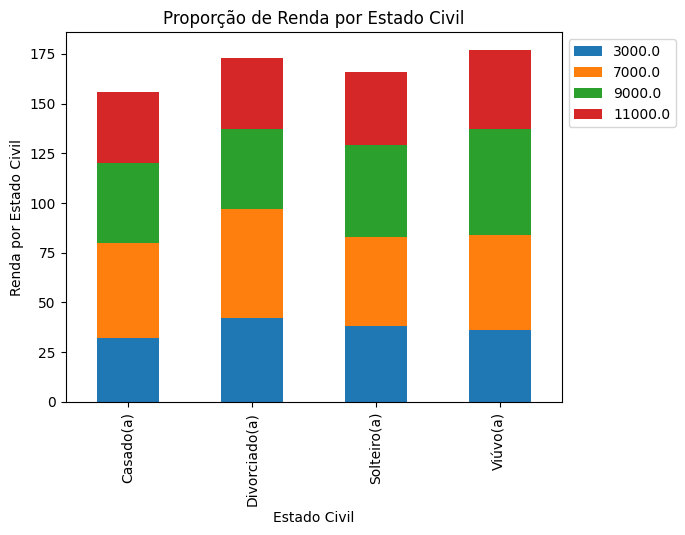

In [7]:
pivot = relacao_estado_civil_renda.pivot(index='Estado Civil',
                                         columns='renda_media_numerica',
                                         values='relacao_renda_estado_civil')
pivot.plot(kind='bar',
           stacked='true')

plt.title('Proporção de Renda por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Renda por Estado Civil')
plt.legend(title='Estado Civil')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Mostrando o gráfico
plt.show()
